## Decision Tree with different hyperparameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(data = iris.data, columns =  ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split

# Lets only use the first 3 features as variable to predict
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:3], df['class'], random_state = 42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# we can define a function to do the tree building and print out accuracy score
def decTreeScore(crit = 'gini', maxDepth = None, minSamples = 1, minSplit = 2):
    ''' construct a decision tree, train it, and then print out its accuracy score
        Args:
            crit: criterion, gini impurity or entropy(infomation gain)
            maxDepth: maximum depth tree can have
            minSamples: minimum samples can exist in a single leaf
            minSplit: minimum samples needed to do a split in tree
    '''
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, dect.predict(X_test))
    print(accuracy)
    return accuracy

In [6]:
decTreeScore()

0.9736842105263158


0.9736842105263158

In [7]:
acuScore = []
testParam = np.arange(1, 20, 1)
for i in testParam:
    acuScore.append(decTreeScore(maxDepth = i))

0.6842105263157895
0.9736842105263158
0.9736842105263158
1.0
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'max depth')]

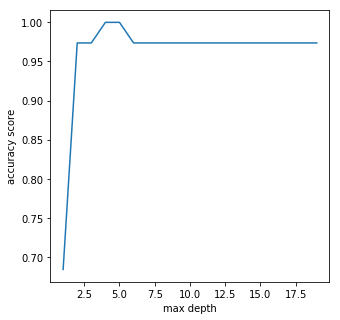

In [8]:
# plot a graph maximum depth vs. accuracy score.
# this can help us choose an optimal value for this hyperparams
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'max depth', ylabel = 'accuracy score')

In [9]:
acuScore = []
for i in testParam:
    acuScore.append(decTreeScore(minSamples = i))

0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9473684210526315
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'minimum samples in a leaf')]

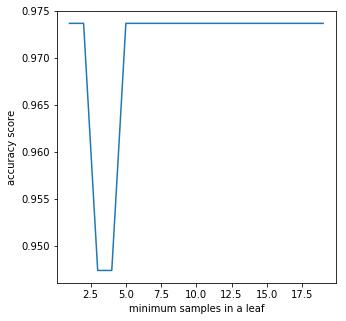

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'minimum samples in a leaf', ylabel = 'accuracy score')

In [11]:
acuScore = []
for i in np.arange(2, 20, 1):
    acuScore.append(decTreeScore( minSplit = i))

0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158


In [12]:
decTreeScore(crit = 'entropy') # use entropy to calculate the score

0.9473684210526315


0.9473684210526315

In [13]:
acuScore = []
for i in testParam:
    acuScore.append(decTreeScore(crit = 'entropy', maxDepth = i))

0.6842105263157895
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9473684210526315
0.9210526315789473
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'max Depth (entropy)')]

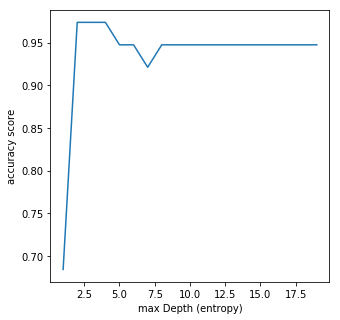

In [14]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'max Depth (entropy)', ylabel = 'accuracy score')

In [15]:
acuScore = []
for i in np.arange(2, 20, 1):
    acuScore.append(decTreeScore(crit = 'entropy', minSplit = i))

0.9473684210526315
0.868421052631579
0.868421052631579
0.868421052631579
0.868421052631579
0.868421052631579
0.868421052631579
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9736842105263158
0.9736842105263158
0.9736842105263158


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'minimum samples to do a split')]

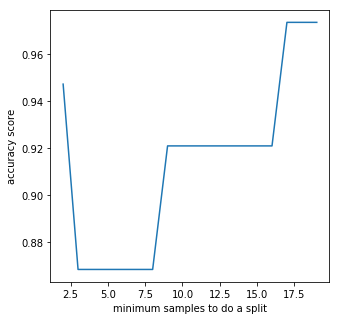

In [16]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(np.arange(2, 20, 1), acuScore) 
ax.set(xlabel = 'minimum samples to do a split', ylabel = 'accuracy score')

In [17]:
# we can change maximum depth and minimum samples in a leaf at the same time
for i in np.arange(1, 10, 1):
    decTreeScore(maxDepth = i, minSamples = i)
    
    
# when both values are greater than 4, the accuracy score is the highest

0.6842105263157895
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158


In [18]:
# It appears to be using gini score and set maximum depth, minimum samples in a leaf and minimum samples needed to split to 5
# can raise the accuracy score to its highest
decTree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split = 5)
decTree.fit(X_train, y_train)
print(accuracy_score(y_test, decTree.predict(X_test)))

0.9736842105263158


### Larger dataset
Let's use some large financial data from UCI 

Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon 

In [19]:
df_lg = pd.read_csv('Wholesale.csv')
df_lg.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_lg.iloc[:,2:], df_lg['Channel'], random_state =42)

In [46]:
X2_train.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
314,10617,1795,7647,1483,857,1233
3,13265,1196,4221,6404,507,1788
18,18601,6327,10099,2205,2767,3181
393,23632,6730,3842,8620,385,819
60,8590,3045,7854,96,4095,225


In [21]:
def decTreeScore2(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(X2_train, y2_train)
    accuracy = accuracy_score(y2_test, dect.predict(X2_test))
    print(accuracy)
    return accuracy

In [22]:
decTreeScore2()
# the accuracy score for our model with default hyperparams is about 0.88

0.8818181818181818


0.8818181818181818

In [23]:
decTreeScore2(crit = 'entropy')
# if we use entropy to calculate infomation gain instead of gini score, the accuracy drops

0.8545454545454545


0.8545454545454545

In [24]:
# use different maximum depth of the tree
for i in np.arange(1, 15, 1):
    decTreeScore2(maxDepth = i)
    
    
# from the result we see that when maximum depth allowed is 2 or 5, the accuracy score is highest

0.8818181818181818
0.9
0.8818181818181818
0.8909090909090909
0.9
0.8727272727272727
0.8636363636363636
0.8727272727272727
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818


In [25]:
for i in np.arange(1, 15, 1):
    decTreeScore2(minSamples = i)
    
# when the minimum samples allowed in a leaf is  greater than 8, the accuracy score is the highest

0.8818181818181818
0.8909090909090909
0.8909090909090909
0.8818181818181818
0.8727272727272727
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.9
0.9
0.9
0.9
0.9
0.9


In [26]:
for i in np.arange(2, 15,1):
    decTreeScore2(minSplit = i)
    
# the value of minimum samples required to split doesn't really affect accuracy much

0.8818181818181818
0.8909090909090909
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
0.8818181818181818
